In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)/'images'

In [3]:
files = get_image_files(path)
files[0].name

'american_bulldog_146.jpg'

In [4]:
pattern = r'^(.*)_\d+.jpg'

In [5]:
dls = ImageDataLoaders.from_name_re(
    path, fnames=files, pat=pattern,
    seed=11, item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224))

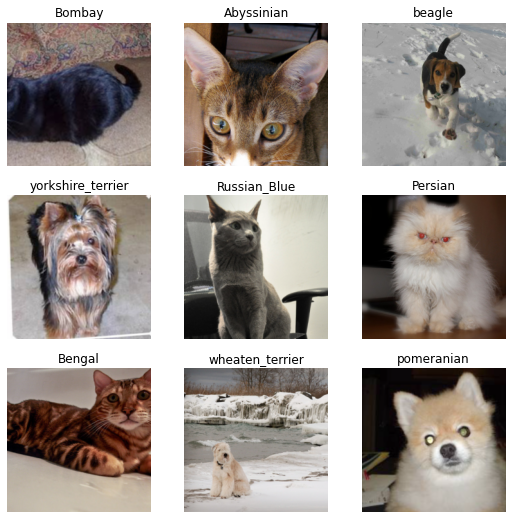

In [6]:
dls.show_batch()

In [7]:
learn = cnn_learner(dls, resnet34, metrics=error_rate, model_dir='/storage/models')

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.00363078061491251)

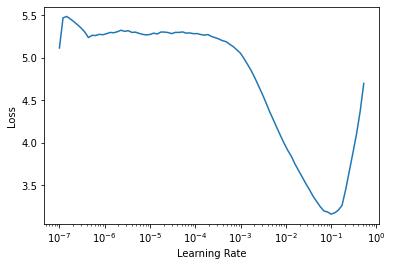

In [8]:
learn.lr_find()

In [9]:
learn.fine_tune(4, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.295340,0.270505,0.079161,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.472487,0.379814,0.110961,00:30
1,0.411418,0.271016,0.088633,00:30
2,0.260764,0.212542,0.058187,00:30
3,0.150082,0.201648,0.060217,00:30


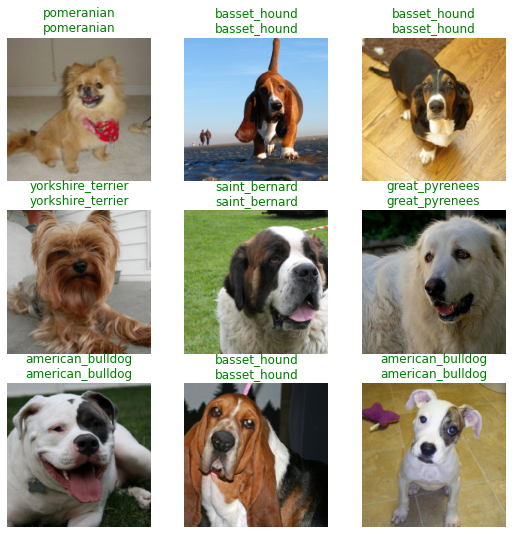

In [10]:
learn.show_results()

In [11]:
interp = Interpretation.from_learner(learn)

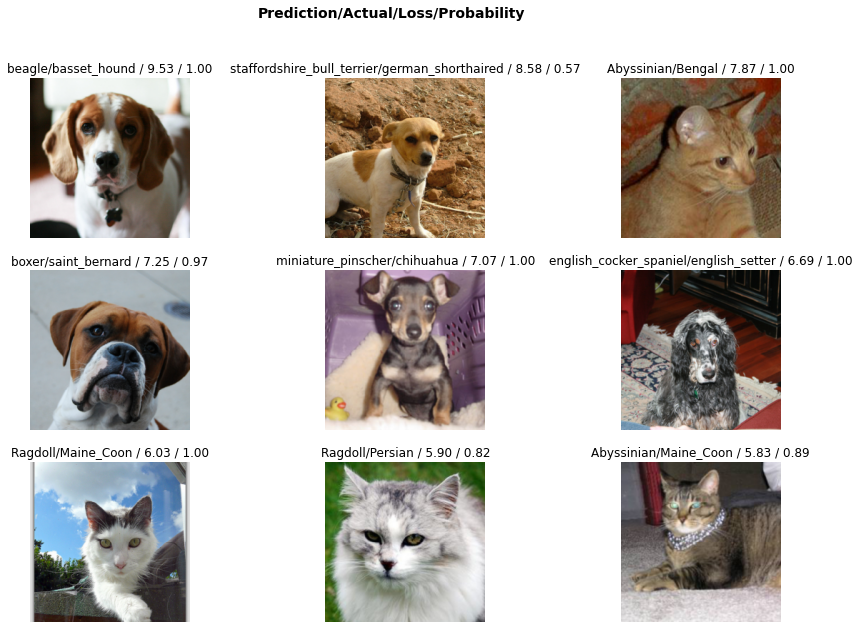

In [12]:
interp.plot_top_losses(9, figsize=(15,10))